### Import necessary packages

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as stats

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


### Read the input data file

In [2]:
resp_df = pd.read_csv('responses.csv')
col_df  = pd.read_csv('columns.csv')

In [3]:
resp_df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [4]:
col_df.sample(n=3)

,original,short
34,Mathematics,Mathematics
30,Action movies,Action
64,"Thunder, lightning",Storm


### Print all the rows from the column file

In [5]:
for i in range(0,col_df.shape[0]):
    print(col_df.loc[i,:],'\n')

original    I enjoy listening to music.
short                             Music
Name: 0, dtype: object 

original                   I prefer.
short       Slow songs or fast songs
Name: 1, dtype: object 

original    Dance, Disco, Funk
short                    Dance
Name: 2, dtype: object 

original    Folk music
short             Folk
Name: 3, dtype: object 

original    Country
short       Country
Name: 4, dtype: object 

original          Classical
short       Classical music
Name: 5, dtype: object 

original    Musicals
short        Musical
Name: 6, dtype: object 

original    Pop
short       Pop
Name: 7, dtype: object 

original    Rock
short       Rock
Name: 8, dtype: object 

original     Metal, Hard rock
short       Metal or Hardrock
Name: 9, dtype: object 

original    Punk
short       Punk
Name: 10, dtype: object 

original    Hip hop, Rap
short        Hiphop, Rap
Name: 11, dtype: object 

original    Reggae, Ska
short       Reggae, Ska
Name: 12, dtype: object 

original    Sw

Name: 139, dtype: object 

original    Age
short       Age
Name: 140, dtype: object 

original    Height
short       Height
Name: 141, dtype: object 

original    Weight
short       Weight
Name: 142, dtype: object 

original    How many siblings do you have?
short                   Number of siblings
Name: 143, dtype: object 

original    Gender
short       Gender
Name: 144, dtype: object 

original                   I am
short       Left - right handed
Name: 145, dtype: object 

original    Highest education achieved
short                        Education
Name: 146, dtype: object 

original    I am the only child
short                Only child
Name: 147, dtype: object 

original    I spent most of my childhood in a
short                          Village - town
Name: 148, dtype: object 

original    I lived most of my childhood in a
short                  House - block of flats
Name: 149, dtype: object 



In [6]:
col_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
original    150 non-null object
short       150 non-null object
dtypes: object(2)
memory usage: 2.4+ KB


In [7]:
col_df.describe()

,original,short
count,150,150
unique,150,150
top,I enjoy childrens' company.,House - block of flats
freq,1,1


In [8]:
resp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB


In [9]:
resp_df.describe(include='all')

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,...,1003.000000,990.000000,990.000000,1004.000000,1004,1007,1009,1008,1006,1006
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,2,6,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,female,right handed,secondary school,no,city,block of flats
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,593,906,621,754,707,595
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,...,20.433699,173.514141,66.405051,1.297809,NaN,NaN,NaN,NaN,NaN,NaN
std,0.664049,0.833931,1.170568,1.138916,1.076136,1.252570,1.260845,1.161400,1.184861,1.372995,...,2.828840,10.024505,13.839561,1.013348,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,15.000000,62.000000,41.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,5.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,...,19.000000,167.000000,55.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,5.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,...,20.000000,173.000000,64.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,3.000000,...,22.000000,180.000000,75.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN


### As the requirement is to find whether Spending Habits and Healthy Lifestyle is related to Gender and Place or not, create a new dataframe with required columns alone

In [10]:
df = pd.concat([resp_df['Gender'],resp_df['Village - town'],resp_df['Finances'],resp_df['Healthy eating']],axis=1)

In [11]:
df.sample(5)

,Gender,Village - town,Finances,Healthy eating
94,male,city,3.0,2.0
664,female,village,4.0,3.0
252,female,village,5.0,3.0
991,male,city,3.0,1.0
999,male,city,3.0,4.0


In [12]:
df.shape

(1010, 4)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 4 columns):
Gender            1004 non-null object
Village - town    1006 non-null object
Finances          1007 non-null float64
Healthy eating    1007 non-null float64
dtypes: float64(2), object(2)
memory usage: 31.6+ KB


In [14]:
df.describe(include='all')

,Gender,Village - town,Finances,Healthy eating
count,1004,1006,1007.000000,1007.000000
unique,2,2,NaN,NaN
top,female,city,NaN,NaN
freq,593,707,NaN,NaN
mean,NaN,NaN,3.023833,3.031778
std,NaN,NaN,1.144365,0.936865
min,NaN,NaN,1.000000,1.000000
25%,NaN,NaN,2.000000,3.000000
50%,NaN,NaN,3.000000,3.000000
75%,NaN,NaN,4.000000,4.000000


### List number of missing values in each column

In [15]:
df.isnull().sum()

Gender            6
Village - town    4
Finances          3
Healthy eating    3
dtype: int64

### Identify the frequency

In [16]:
for col in df.columns:
    print(df[col].value_counts(),'\n')    

female    593
male      411
Name: Gender, dtype: int64 

city       707
village    299
Name: Village - town, dtype: int64 

3.0    358
4.0    252
2.0    174
1.0    125
5.0     98
Name: Finances, dtype: int64 

3.0    504
4.0    239
2.0    137
1.0     81
5.0     46
Name: Healthy eating, dtype: int64 



### Fill the missing values

Here,

categorical variable(nominal) are filled with mode

categorical variable(Ordinal) are filled with median


In [17]:
for col in df:
    if(df[col].dtype == np.object):
        df[col].fillna(value=df[col].mode().values[0], inplace=True)
    else:
        df[col].fillna(value=df[col].median(), inplace=True)
        

In [18]:
df.isnull().sum()

Gender            0
Village - town    0
Finances          0
Healthy eating    0
dtype: int64

In [19]:
for col in df:
    print(df[col].value_counts(),'\n')
    

female    599
male      411
Name: Gender, dtype: int64 

city       711
village    299
Name: Village - town, dtype: int64 

3.0    361
4.0    252
2.0    174
1.0    125
5.0     98
Name: Finances, dtype: int64 

3.0    507
4.0    239
2.0    137
1.0     81
5.0     46
Name: Healthy eating, dtype: int64 



### Coding the categorical variable in the given data-frame

Here,

Categorical varibales of type object in the data set was coded using the following technique
1. panda's categorical encoder

Though sklearn preprocessing model's label/one-hot techniques can be used, in order to understand the above panda's functionality was used

In [20]:
# categorical coder
for col in df:
    if(df[col].dtype == np.object):
        df[col] = df[col].astype('category').cat.codes
    else:
        pass

In [21]:
df.describe()

,Gender,Village - town,Finances,Healthy eating
count,1010.000000,1010.000000,1010.000000,1010.000000
mean,0.406931,0.296040,3.023762,3.031683
std,0.491505,0.456735,1.142663,0.935473
min,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,2.000000,3.000000
50%,0.000000,0.000000,3.000000,3.000000
75%,1.000000,1.000000,4.000000,4.000000
max,1.000000,1.000000,5.000000,5.000000


In [22]:
for col in df:
    print(df[col].value_counts(),'\n')

0    599
1    411
Name: Gender, dtype: int64 

0    711
1    299
Name: Village - town, dtype: int64 

3.0    361
4.0    252
2.0    174
1.0    125
5.0     98
Name: Finances, dtype: int64 

3.0    507
4.0    239
2.0    137
1.0     81
5.0     46
Name: Healthy eating, dtype: int64 



### Understand the relationship of the features in the given data-set using
1. Correlation matrix / Heatmap
2. pair plot

In [23]:
df.corr()

,Gender,Village - town,Finances,Healthy eating
Gender,1.000000,0.001447,-0.059586,-0.062557
Village - town,0.001447,1.000000,0.083357,-0.033572
Finances,-0.059586,0.083357,1.000000,0.098502
Healthy eating,-0.062557,-0.033572,0.098502,1.000000


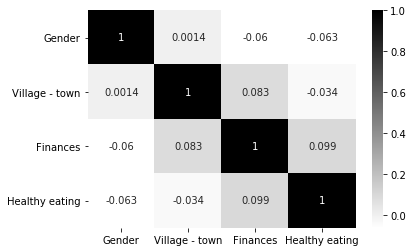

In [24]:
sns.heatmap(df.corr(),annot=True,cmap='binary')
plt.show()

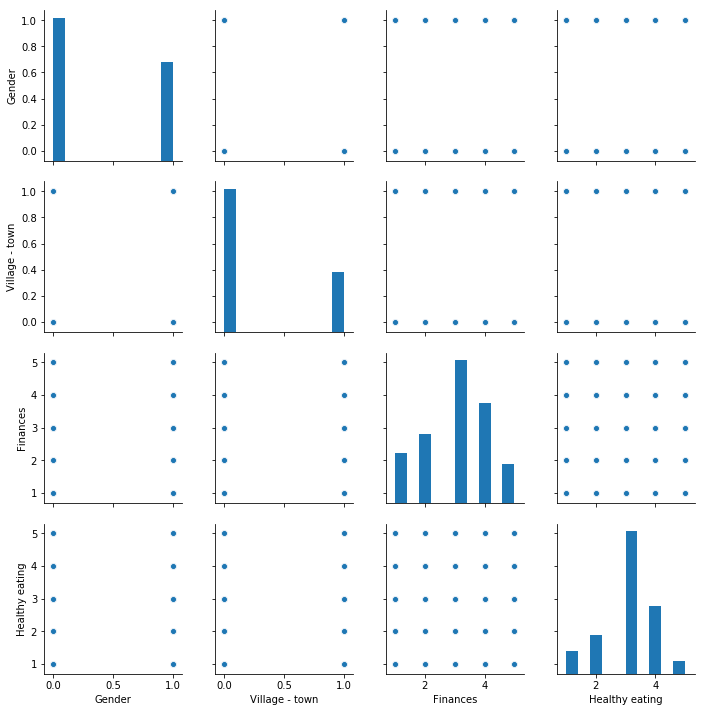

In [25]:
sns.pairplot(df)
plt.show()

### Understanding the probable distribution

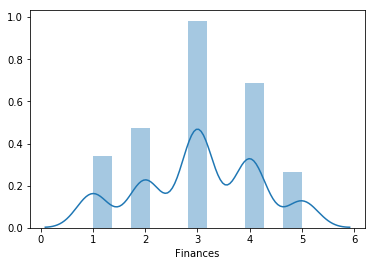

In [26]:
sns.distplot(df['Finances'])

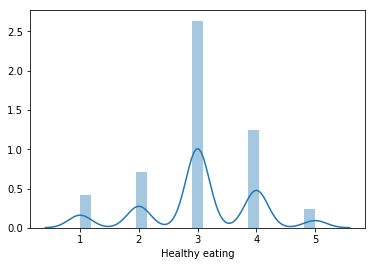

In [27]:
sns.distplot(df['Healthy eating'])

### Note:
There was a chaos whether to consider the columns of interest as category(context and it's meaning) or integer type(dtype says it is numeric). Particularly finances,healthy-eating column.

As from references to the below documentation, concluded it shall be considered as category variable only.

https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html

Therefore chi2-test shall be used for the given tasks.


In the given data-set
* Gender, Village-town is a category type - nominal
* Finance, Healthy-eating is a category type - ordinal

### As all the given task for this project is using chi-square-test define a function and use it

In [28]:

#User defined function, which validates the hypothesis-test for categorical variables(nominal vs ordinal).

def chi2_test_of_independence(dF, g_col, col_of_int):
    
    print('\nchi square independence test for (%s, %s)'%(g_col,col_of_int))
    
    alpha = 0.05 
    print('\nAlpha(significance level) defined as %f'%(alpha))

    # Get the number of unique categorical values and it's frequency as count    
    grp_cnt   = dF[g_col].nunique()    
    grp_val   = dF[g_col].value_counts().values
    grp_index = dF[g_col].value_counts().index
    
    print('\n')
    for i in range(0,grp_cnt):
        print('%s:%d Freq-count:%d:' %(g_col,grp_index[i], grp_val[i]))
        
    # Get the number of unique categorical values    
    CoI_cnt    = dF[col_of_int].nunique()
       
    # As chi-sqr-test-of-independence, whether the 2 or more groups are independet or not for observed frequencies
    # Create an n-dimensional as per requirement, as to read the frequency count of each group from the column of interest
    nd_arr = np.ndarray(shape=(grp_cnt,CoI_cnt))
    print('\nCreated %d-Dimensional array and shape is(%d:%d)'%(nd_arr.ndim, nd_arr.shape[0],nd_arr.shape[1]))
        
    for i in range(0,grp_cnt):
        print('\n%s:%d'%(g_col,grp_index[i]))
        print('%s:'%(col_of_int))
        print('\tElement \t Freq-count')
        for j in range(0,CoI_cnt):
            nd_arr[i][j] = int(dF.loc[ (df[g_col]== grp_index[i]),col_of_int].value_counts().values[j])
            print('\t%d \t\t %d'%(dF.loc[ (df[g_col]== grp_index[i]),col_of_int].value_counts().index[j],\
                                      nd_arr[i][j]))            

    #Calculate the stats and p-value
    chi2_stat, p_value, dof, exp_freq = stats.chi2_contingency((nd_arr))
    print('\nchi2_stats:%f p_val:%f'%(chi2_stat, p_value))
    print('\nDegree of freedom:%d'%(dof))
    print('\nexpected frequency:\n{}'.format(exp_freq))
    
    #Conclude the hypotheis based on the derived p-value and significance level
    print('\nInference:')
    if ( float(p_value) < float(alpha) ):
          print('\tAs p_value is less than alpha, reject null-hypothesis')
    else:
          print('\tAs p_value is greater than or equal to alpha, fail to reject null-hypothesis')

### Task 1: Is saving money (finances) gender dependant?


* $H_0$: Savings are independent of gender 
* $H_A$: Dependent of gender-category

Note: from the .value_counts(), Gender-0 = Female, Gender-1 = Male


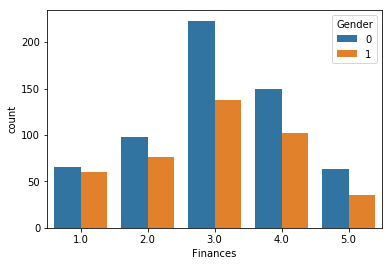

In [29]:
sns.countplot(x='Finances', hue='Gender',data=df)
plt.show()

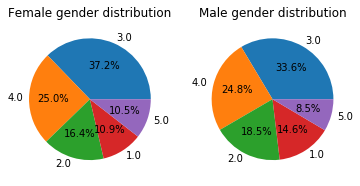

In [30]:
label = df.loc[ (df['Gender']== 0),'Finances'].value_counts().index
f_arr = df.loc[ (df['Gender']== 0),'Finances'].value_counts().values
m_arr = df.loc[ (df['Gender']== 1),'Finances'].value_counts().values

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title('Female gender distribution')
ax1.pie(x=f_arr,labels=label,autopct='%2.1f%%')

ax2.set_title('Male gender distribution')
ax2.pie(x=m_arr,labels=label,autopct='%2.1f%%')

plt.show()

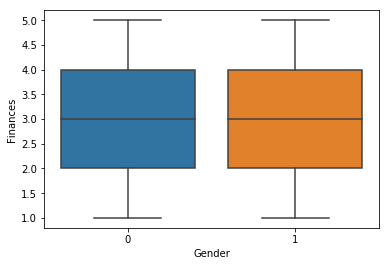

In [31]:
sns.boxplot(data=df, x='Gender', y='Finances')

Calculate the chi-sqr-stats and p-value

In [32]:
chi2_test_of_independence(df,'Gender', 'Finances')


chi square independence test for (Gender, Finances)

Alpha(significance level) defined as 0.050000


Gender:0 Freq-count:599:
Gender:1 Freq-count:411:

Created 2-Dimensional array and shape is(2:5)

Gender:0
Finances:
	Element 	 Freq-count
	3 		 223
	4 		 150
	2 		 98
	1 		 65
	5 		 63

Gender:1
Finances:
	Element 	 Freq-count
	3 		 138
	4 		 102
	2 		 76
	1 		 60
	5 		 35

chi2_stats:5.328891 p_val:0.255185

Degree of freedom:4

expected frequency:
[[214.0980198  149.45346535 103.19405941  74.13366337  58.12079208]
 [146.9019802  102.54653465  70.80594059  50.86633663  39.87920792]]

Inference:
	As p_value is greater than or equal to alpha, fail to reject null-hypothesis


Conclusion:

    From the correlation plot/heatmap, cold infer there is a very weak correlation between gender and finance
    
    From the pie plot, distribution varies and not that significant
    
    From the boxplot, shapes are same for the gender & no outliers
    
    From chi2-stats, we fail to reject the null hypothesis which means that Finances(savings/spending-pattern) are
    independent of gender

### Task 2: Is there any differences in money saving (finances) between people from city or village?

* $H_0$: There is no difference in savings the money between the people from city or village 
* $H_A$: There is a significant difference in savings

Note: from the value_counts, Town coded as 0, Village coded as 1

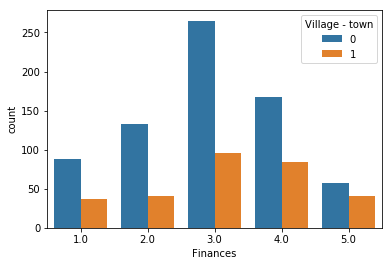

In [33]:
sns.countplot(x='Finances', hue='Village - town',data=df)
plt.show()

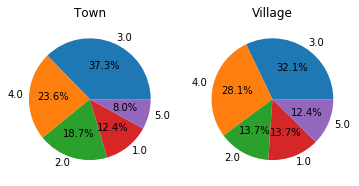

In [34]:
label = df.loc[ (df['Village - town']== 0),'Finances'].value_counts().index
t_arr = df.loc[ (df['Village - town']== 0),'Finances'].value_counts().values
v_arr = df.loc[ (df['Village - town']== 1),'Finances'].value_counts().values

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.pie(x=t_arr,labels=label,autopct='%2.1f%%')
ax1.set_title('Town')

ax2.pie(x=v_arr,labels=label,autopct='%2.1f%%')
ax2.set_title('Village')

plt.show()

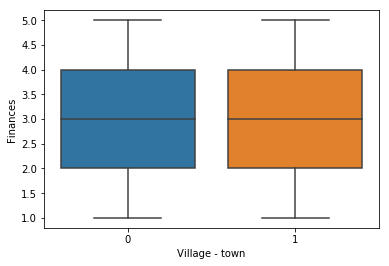

In [35]:
sns.boxplot(data=df, x='Village - town', y='Finances')

In [36]:
chi2_test_of_independence(df,'Village - town', 'Finances')


chi square independence test for (Village - town, Finances)

Alpha(significance level) defined as 0.050000


Village - town:0 Freq-count:711:
Village - town:1 Freq-count:299:

Created 2-Dimensional array and shape is(2:5)

Village - town:0
Finances:
	Element 	 Freq-count
	3 		 265
	4 		 168
	2 		 133
	1 		 88
	5 		 57

Village - town:1
Finances:
	Element 	 Freq-count
	3 		 96
	4 		 84
	2 		 41
	5 		 41
	1 		 37

chi2_stats:10.887714 p_val:0.027855

Degree of freedom:4

expected frequency:
[[254.12970297 177.3980198  122.48910891  90.81089109  66.17227723]
 [106.87029703  74.6019802   51.51089109  38.18910891  27.82772277]]

Inference:
	As p_value is less than alpha, reject null-hypothesis


Conclusion:

    From the correlation plot/heatmap, cold infer there is some correlation between finance and pepole's locality
    
    From the pie plot, distribution varies and not drastically
    
    From the boxplot, plot shape are same & no outliers
    
    From chi2-stats's p-value, we reject the null hypothesis which means that there are significant difference in
    Finance (savings/spending -pattern) between people living in town/village.

### Task 3: Do Women have a Healthier Lifestyle than Men?

* $H_0$: There is no difference between male and female healthier-lifestyle
* $H_A$: There is a significant difference in lifestyle


Note: from the value_counts, Gender-1 = Female, Gender-2 = Male and Gender-1(Female) coded as 0, Gender-2(Male) coded as 1

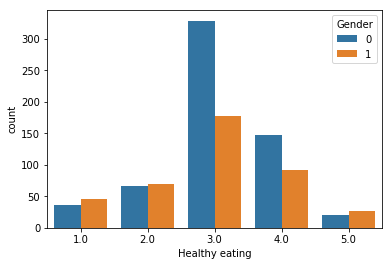

In [37]:
sns.countplot(x='Healthy eating', hue='Gender',data=df)
plt.show()

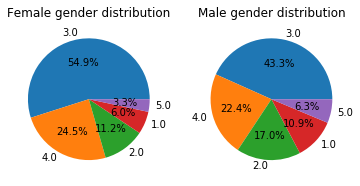

In [38]:
label = df.loc[ (df['Gender']== 0),'Healthy eating'].value_counts().index
f_arr = df.loc[ (df['Gender']== 0),'Healthy eating'].value_counts().values
m_arr = df.loc[ (df['Gender']== 1),'Healthy eating'].value_counts().values

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title('Female gender distribution')
ax1.pie(x=f_arr,labels=label,autopct='%2.1f%%')

ax2.set_title('Male gender distribution')
ax2.pie(x=m_arr,labels=label,autopct='%2.1f%%')

plt.show()

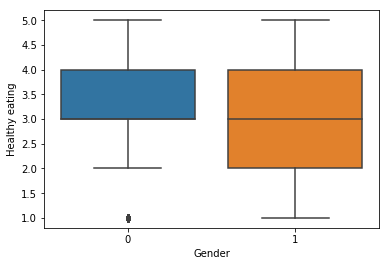

In [39]:
sns.boxplot(data=df,x='Gender',y='Healthy eating')

In [40]:
chi2_test_of_independence(df,'Gender', 'Healthy eating')


chi square independence test for (Gender, Healthy eating)

Alpha(significance level) defined as 0.050000


Gender:0 Freq-count:599:
Gender:1 Freq-count:411:

Created 2-Dimensional array and shape is(2:5)

Gender:0
Healthy eating:
	Element 	 Freq-count
	3 		 329
	4 		 147
	2 		 67
	1 		 36
	5 		 20

Gender:1
Healthy eating:
	Element 	 Freq-count
	3 		 178
	4 		 92
	2 		 70
	1 		 45
	5 		 26

chi2_stats:25.362275 p_val:0.000043

Degree of freedom:4

expected frequency:
[[300.68613861 141.74356436  81.25049505  48.03861386  27.28118812]
 [206.31386139  97.25643564  55.74950495  32.96138614  18.71881188]]

Inference:
	As p_value is less than alpha, reject null-hypothesis


Conclusion:

    From the correlation plot/heatmap, cold infer there is weak correlation between gender and healthy-lifestyle
    
    From the pie plot, distribution varies significantly
    
    From the boxplot, plot shape are different & outliers are there for female gender category
    
    From chi2-stats's p-value, we reject the null hypothesis which means that there are significant difference 
    between male & female lifestyle(w.r.t health)

### Task 4: Are Village People Healthier than City People

* $H_0$: There is no difference in healthier lifestyle status between people from village or city 
* $H_A$: There is a significant difference in lifestyle

Note: from the value_counts, Town coded as 0, Village coded as 1

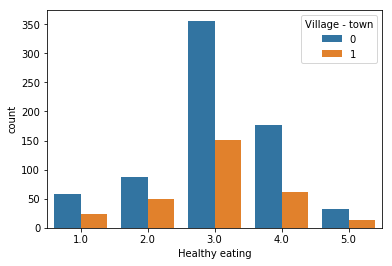

In [41]:
sns.countplot(x='Healthy eating', hue='Village - town',data=df)
plt.show()

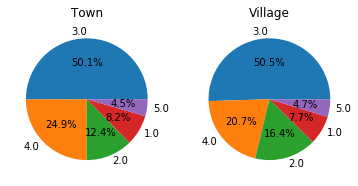

In [42]:
label = df.loc[ (df['Village - town']== 0),'Healthy eating'].value_counts().index
t_arr = df.loc[ (df['Village - town']== 0),'Healthy eating'].value_counts().values
v_arr = df.loc[ (df['Village - town']== 1),'Healthy eating'].value_counts().values

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.pie(x=t_arr,labels=label,autopct='%2.1f%%')
ax1.set_title('Town')

ax2.pie(x=v_arr,labels=label,autopct='%2.1f%%')
ax2.set_title('Village')

plt.show()

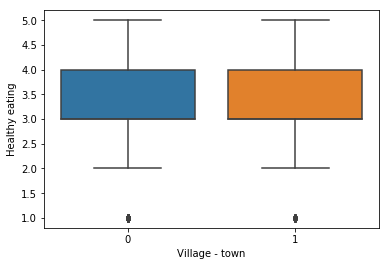

In [43]:
sns.boxplot(data=df, x='Village - town',y='Healthy eating')

In [44]:
chi2_test_of_independence(df,'Village - town', 'Healthy eating')


chi square independence test for (Village - town, Healthy eating)

Alpha(significance level) defined as 0.050000


Village - town:0 Freq-count:711:
Village - town:1 Freq-count:299:

Created 2-Dimensional array and shape is(2:5)

Village - town:0
Healthy eating:
	Element 	 Freq-count
	3 		 356
	4 		 177
	2 		 88
	1 		 58
	5 		 32

Village - town:1
Healthy eating:
	Element 	 Freq-count
	3 		 151
	4 		 62
	2 		 49
	1 		 23
	5 		 14

chi2_stats:4.114720 p_val:0.390703

Degree of freedom:4

expected frequency:
[[356.90792079 168.24653465  96.44257426  57.02079208  32.38217822]
 [150.09207921  70.75346535  40.55742574  23.97920792  13.61782178]]

Inference:
	As p_value is greater than or equal to alpha, fail to reject null-hypothesis


Conclusion:

    From the correlation plot/heatmap, cold infer there is weak correlation for healthy-lifestyle between people
    living in town/village
    
    From the pie plot, distribution varies and not that significant
    
    From the boxplot, plot shapes are same & outliers are there for both the locality category
    
    From chi2-stats's p-value, we reject the null hypothesis which means that there are no significant difference 
    between between people lifestyle from town/village.

### Project conclusion:

From the above tasks it can be inferred and collectively concluded as follows
* Finances (saving/spending-pattern) is not related to gender, whereas dependent on people's locality(town/village)
* Lifestyle (w.r.t health) is related to gender irrespective of locality ( i.e. not dependent on people's living locality is village or town)    

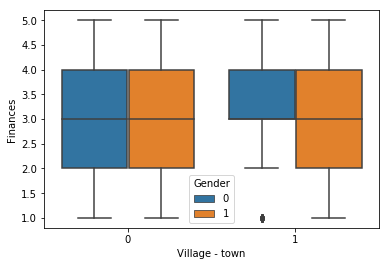

In [45]:
sns.boxplot(data=df,y='Finances',x='Village - town',hue='Gender')
plt.show()

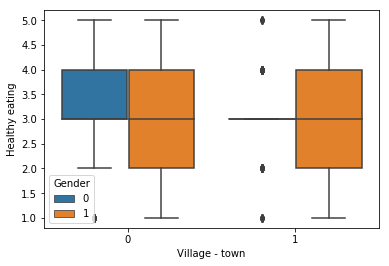

In [46]:
sns.boxplot(data=df,y='Healthy eating',x='Village - town',hue='Gender')
plt.show()

### EOF